In [ ]:
# Import Dataset

In [1]:
from keras.datasets import mnist

In [3]:
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
xtrain.shape # total 60000 images of 28*28

(60000, 28, 28)

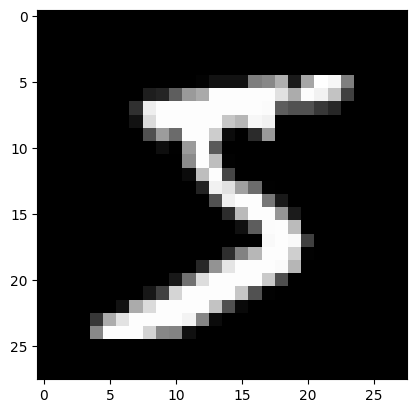

In [5]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray') # o image
plt.show()

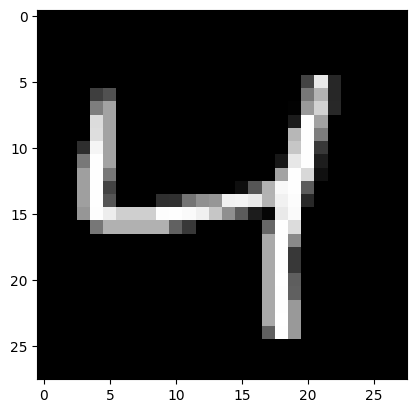

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[2],cmap='gray') #2nd image
plt.show()

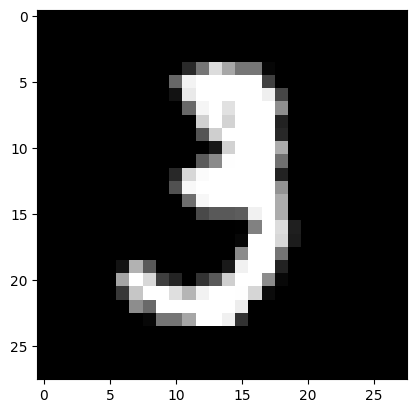

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[10],cmap='gray')#10th image
plt.show()

In [8]:
import seaborn as sns

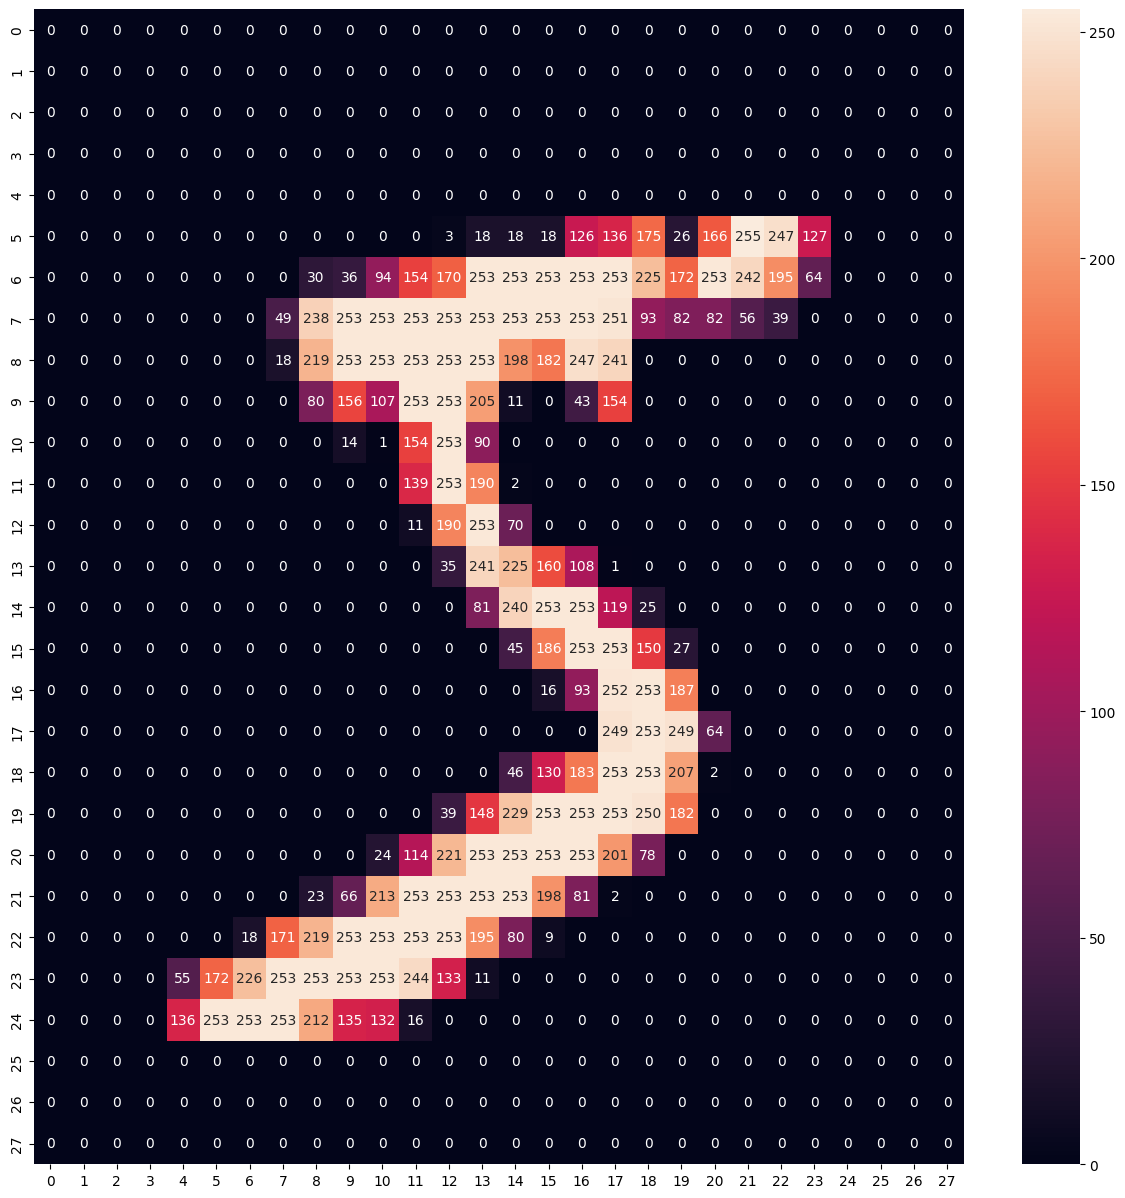

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot =True,fmt='d')
plt.show()

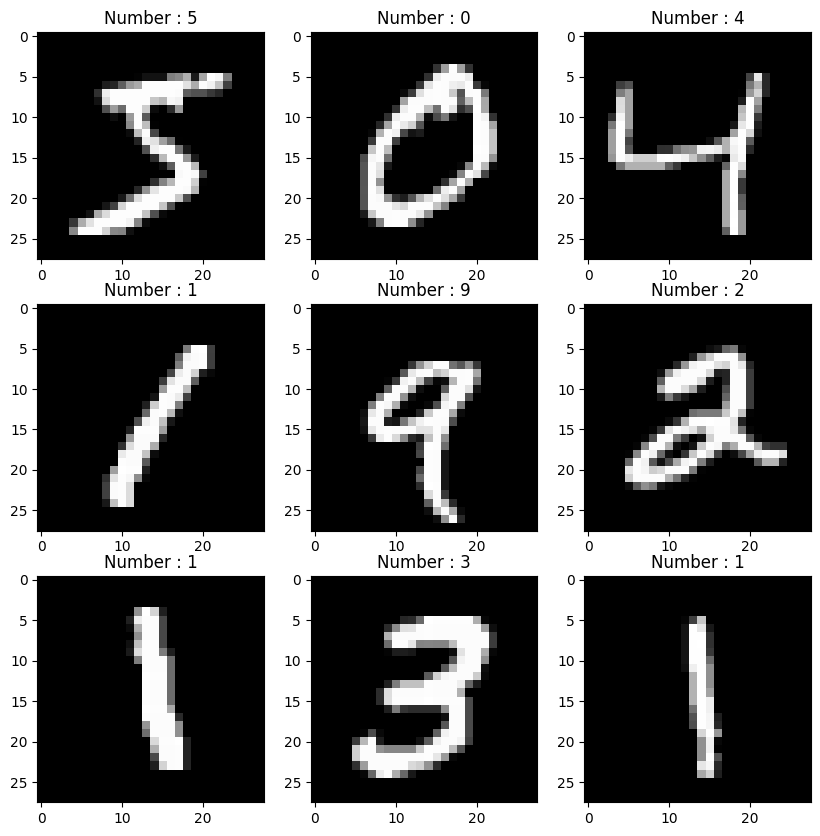

In [10]:
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1) # due to loop it is 0-8 so +1 is written
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f'Number : {ytrain[i]}') # here y is number of image

In [ ]:
# preprocessing the data

In [ ]:
## pixel values are between 0-255, so divide xtrain and xtest by 255 to scale it in range 0-1

In [11]:
xtrain_scl= xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [ ]:
# check how many unique values are in output training data

In [12]:
import numpy as np

In [13]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# for multiclass classsification apply one hot encoding on y feature. wherever value is present it will show 1 , and will show 0 in rest places i.e. one hot encoding

In [16]:
from keras.utils import to_categorical
ytrain_cat= to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [17]:
ytrain_cat[0:3] # 1st image is of 5, 2nd is of 0, 3rd is of 4

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
# make neural network

In [19]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D, MaxPool2D, Flatten, Dropout, Dense

In [ ]:
@ Visual demo of cnn
https://deeplizard.com/resource/pavq7noze2


In [30]:
# initialize the model
model=Sequential()

# Add input layer
model.add(Input(shape=(28,28,1)))

#Add Convolution layer 1
model.add(Convolution2D(filters=32,activation='relu',kernel_size=(3,3))) # filter size is of 3 by 3
# we dont have to worry about the values in filter matrix

# Add max pooling layer
model.add(MaxPool2D(pool_size=(2,2))) # it will take 2 squares by 2 sqares and select max value out of it

#Add Convolution layer 2
model.add(Convolution2D(filters=64,activation='relu',kernel_size=(3,3)))

# Add max pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Add a flatten layer
model.add(Flatten()) # features will come in a single line of squares

# Add a dropout layer
model.add(Dropout(0.5)) # This dropout layer will randomly set 50% of the input units to zero during each training iteration.


#Create a output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax')) # 1 is for gray

In [21]:
# compile and fit the model

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=15)

Epoch 1/15
1500/1500 [==============================] - 11s 4ms/step - loss: 0.6429 - accuracy: 0.8782 - val_loss: 0.0953 - val_accuracy: 0.9707
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1621 - accuracy: 0.9499 - val_loss: 0.0690 - val_accuracy: 0.9779
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1233 - accuracy: 0.9621 - val_loss: 0.0650 - val_accuracy: 0.9817
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1070 - accuracy: 0.9685 - val_loss: 0.0518 - val_accuracy: 0.9843
Epoch 5/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0964 - accuracy: 0.9706 - val_loss: 0.0554 - val_accuracy: 0.9838
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0915 - accuracy: 0.9723 - val_loss: 0.0535 - val_accuracy: 0.9840
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0823 - accuracy: 0.9752 - val_loss: 0.0454 - val_accuracy

In [23]:
# plot learning curve

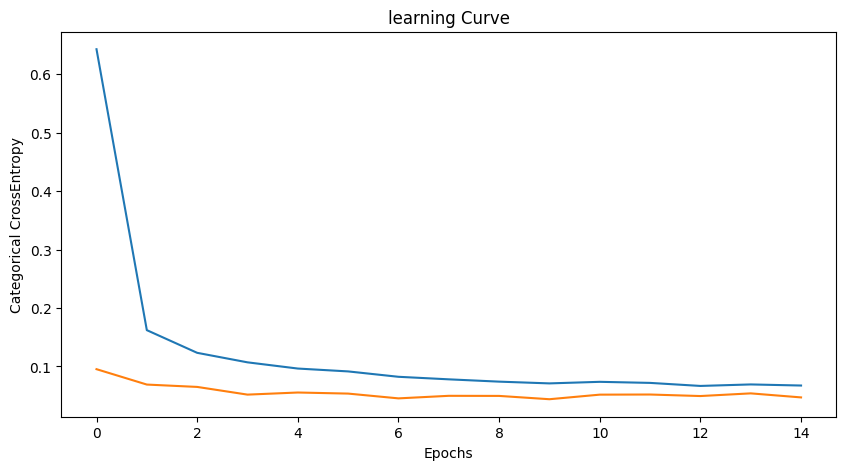

In [33]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical CrossEntropy')
plt.title('learning Curve')
plt.show()

In [ ]:
# Model Evaluation

In [34]:
model.evaluate(xtrain,ytrain_cat) # 0.02 is error, 0.99 is score

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9908


[0.028682159259915352, 0.9908333420753479]

In [ ]:
#Predict probabilities for training and testing

In [35]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

313/313 [==============================] - 1s 3ms/step


In [36]:
yprob_train[:5] #probability of 5th number(9.98) is more in 1st array. there are total 0to9 numbers

array([[5.73130389e-12, 2.01529321e-10, 2.67459388e-11, 1.43722957e-03,
        1.37966756e-11, 9.98559415e-01, 2.57972022e-09, 8.95436891e-10,
        2.78284006e-06, 5.07618040e-07],
       [9.99999642e-01, 1.01271517e-13, 1.58267397e-07, 9.41506248e-12,
        1.62677150e-10, 2.93790979e-13, 2.29716530e-08, 4.38983502e-11,
        8.42672421e-08, 1.06820423e-07],
       [3.16568823e-15, 2.27501914e-05, 2.58703059e-10, 7.05061281e-13,
        9.99977112e-01, 4.11210576e-14, 2.39840987e-14, 8.74271038e-08,
        6.28606778e-10, 1.10045297e-08],
       [1.43890535e-08, 9.99941707e-01, 8.83486493e-08, 1.32777178e-10,
        9.70461679e-06, 5.90514790e-11, 6.45181109e-09, 2.08052847e-06,
        4.61915006e-05, 2.01994595e-07],
       [1.09197583e-13, 1.74731313e-10, 1.53820989e-09, 1.35375755e-09,
        1.25284496e-04, 2.77622196e-12, 3.08491279e-16, 6.77000571e-08,
        3.30460352e-05, 9.99841571e-01]], dtype=float32)

In [ ]:
# give final predictions

In [37]:
ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)

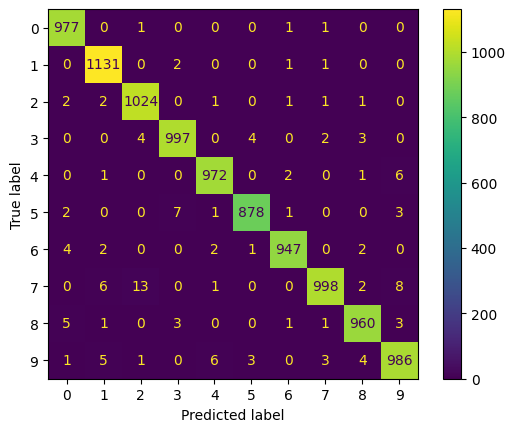

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()